In [1]:
from billiards import *

In [2]:
def square(t):
    if t < 0.25:
        return np.array([4*t - .5,-.5])
    if t <= 0.5:
        return np.array([.5,4*(t-.25) - .5])
    if t <= 0.75:
        return np.array([.5-(4*(t-.5)),.5])
    if t <= 1: 
        return np.array([-.5,.5-(4*(t-.75))])
    else:
        return np.array([-.5,-.5])

In [10]:
x = np.array([0,0])
v = np.array([1,7])
p = np.array([0,0])

N = 20
#stores result where X[i,j] is the ith bounce's jth result in (x, v, p-section)
X = np.zeros([N,3,2])
X[0] = x,v,p

#bounce N times and plot trajectories
for i in range(N-1):
    X[i+1] = bounce(X[i,0], X[i,1], square, tol = 1e-16, poincare = True)

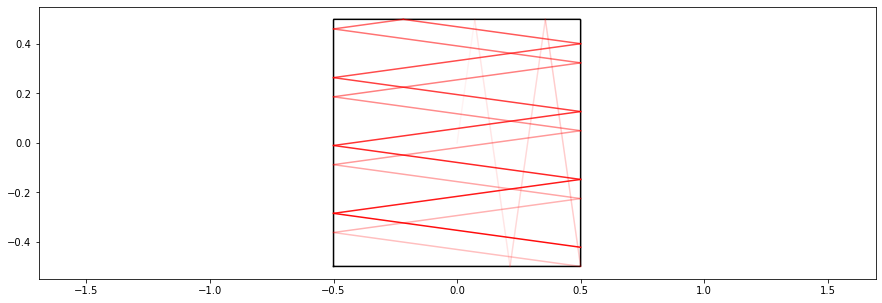

In [11]:
fig = plt.figure(figsize = (15,5))

#plot circlular border
t = np.linspace(0, 1, 1000)
border = np.zeros([t.shape[0], 2])
for i in range(border.shape[0]):
    border[i] = square(t[i])
    
plt.plot(border[:,0], border[:,1], color = 'black')
plt.axis('equal')

for i in range(len(X)-1):
    plt.plot([X[i,0][0], X[i+1,0][0]], [X[i,0][1], X[i+1,0][1]], color = 'red', alpha = (i+1)/len(X))

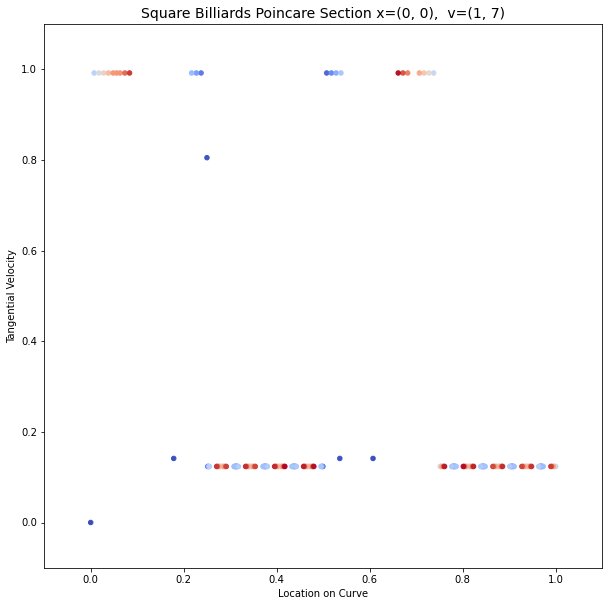

In [9]:
fig = plt.figure(figsize = (10,10))
imgname = 'placeholder'

delt = .1
cmap = np.arange(X.shape[0])
plt.scatter(X[:,2,0], X[:,2,1], cmap = 'coolwarm', c = cmap, alpha = 1, s = 20)
plt.xlim(0-delt,1+delt)
plt.ylim(0-delt,1+delt)
plt.xlabel('Location on Curve')
plt.ylabel("Tangential Velocity")
plt.title(f"Square Billiards Poincare Section x=({x[0]}, {x[1]}),  v=({v[0]}, {v[1]})", fontsize = 14)
plt.savefig(f'./images/{imgname}.png')